In [3]:
#Python Project On UBER DATA
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
uber=pd.read_csv("UBERDataset.csv")

In [5]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [9]:
uber.shape

(1156, 7)

In [11]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

DATA PREPROCESSING

In [16]:
#WE CAN SEE THAT THERE ARE SO MANY NULL/EMPTY VALUES IN PURPOSE COLUMN
#Replace All NaN To Not

In [18]:
uber["PURPOSE"].fillna("Personal Reasons", inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12252\1937617589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber["PURPOSE"].fillna("Personal Reasons", inplace=True)


In [20]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [22]:
#NAN Replaced With Personal Reasons

In [24]:
#Now We Have To Change The Type Of Date/Time From Object To Date And Time

In [26]:
uber["START_DATE"]=pd.to_datetime(uber["START_DATE"],errors="coerce")
uber["END_DATE"]=pd.to_datetime(uber["END_DATE"],errors="coerce")

In [28]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [30]:
#Now Lets Seperate Date And Time In New Columns "Date","Time"

In [32]:
from datetime import datetime
uber["DATE"]=pd.DatetimeIndex(uber["START_DATE"]).date
uber["TIME"]=pd.DatetimeIndex(uber["START_DATE"]).hour

In [34]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [36]:
#Lets Make New Category Column Where As Per Time Their Will Be Morning,Afternoon,Evening, And Night Will Be Shown!!!

In [38]:
uber["DAY-NIGHT"]=pd.cut(x=uber["TIME"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])

In [40]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [42]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [44]:
#Now Dropping All Null Values From DataSet

In [46]:
uber.dropna(inplace=True)

In [48]:
uber.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
DATE          0
TIME          0
DAY-NIGHT     0
dtype: int64

In [50]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


DATA VISUALIZATION

In [53]:
#Now Lets Do The Data Visualization As Per Question

In [55]:
#Q1 IN WHICH CATEGORY DO PEOPLE BOOK THE MOST UBER RIDES?

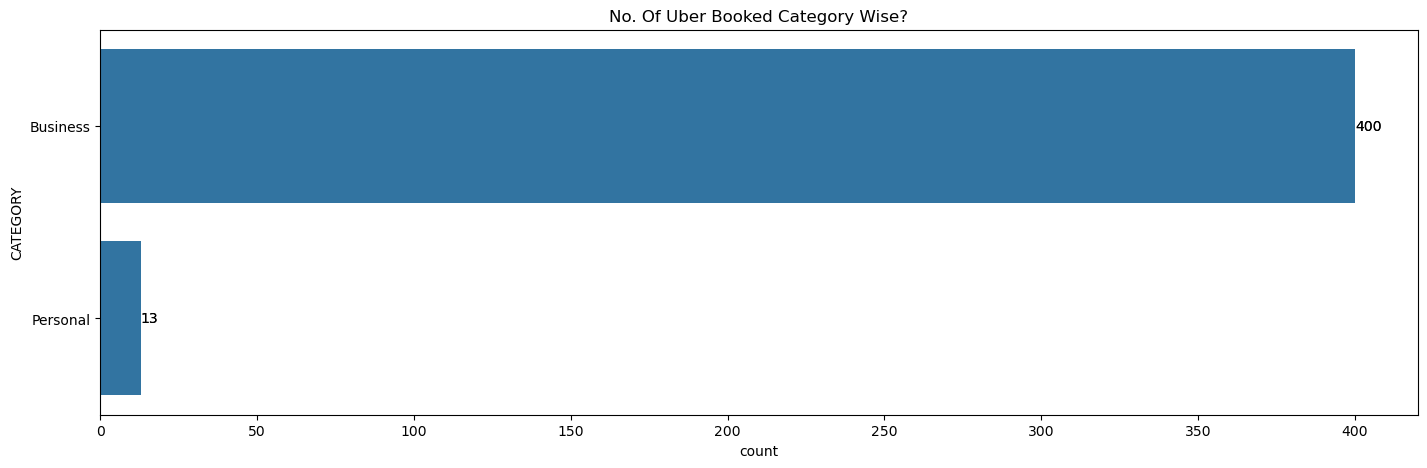

In [57]:
plt.figure(figsize=(17,5))
plt.title("No. Of Uber Booked Category Wise?")
cp=sns.countplot(uber["CATEGORY"])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[0])
plt.show()

In [59]:
#So We Can Say That Mostly People Book The Uber For Business Category!!!

In [61]:
#Q2 FOR WHICH PURPOSE DO PEOPLE BOOK UBER RIDES THE MOST?

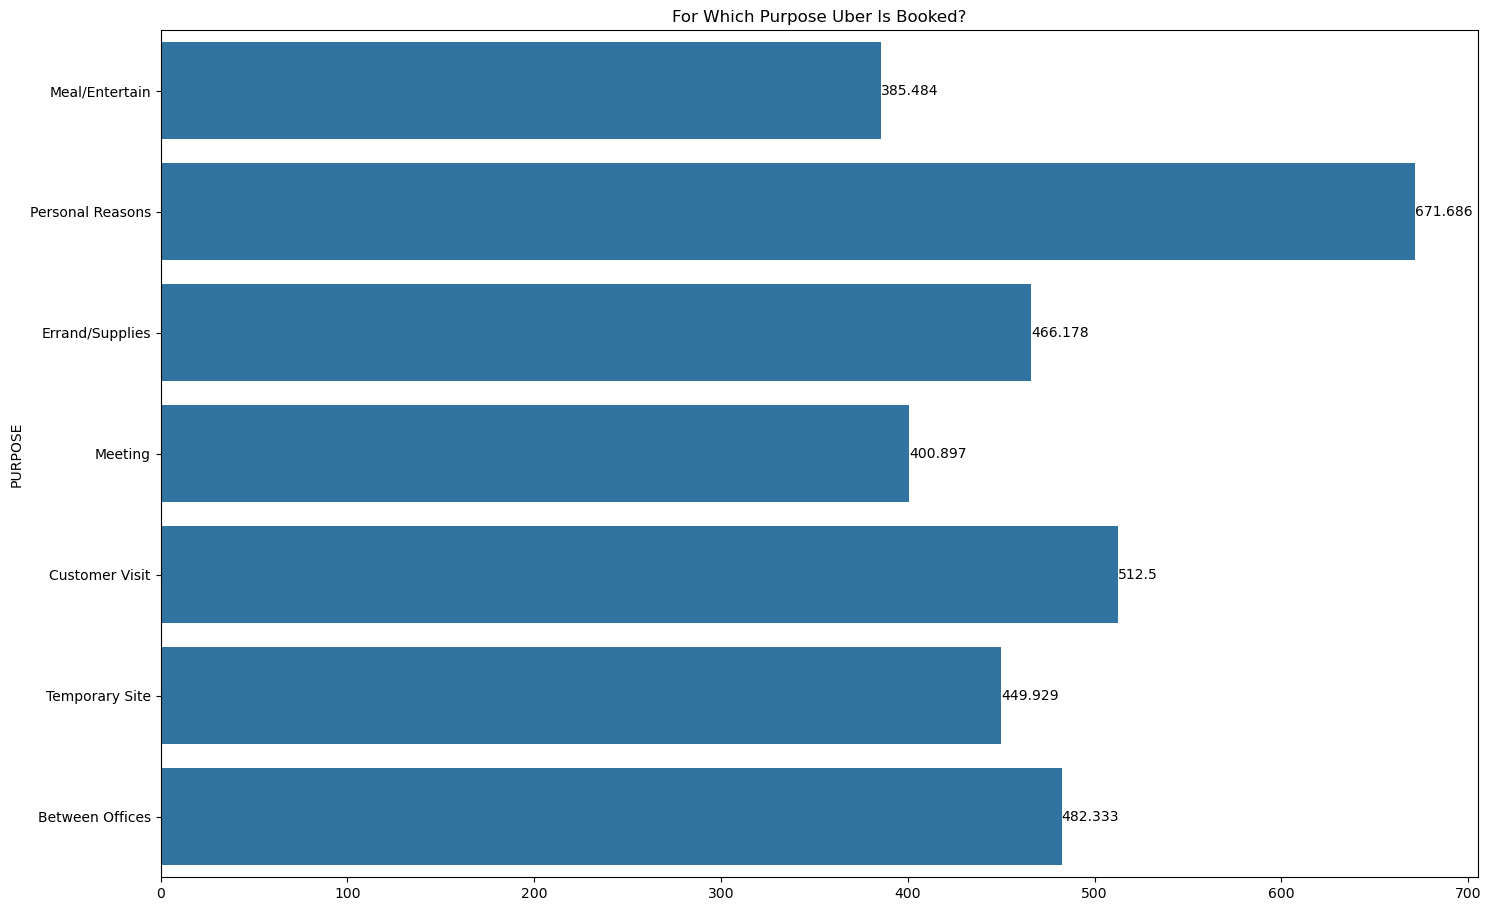

In [63]:
plt.figure(figsize=(17, 11))
plt.title("For Which Purpose Uber Is Booked?")
cp=sns.barplot(uber["PURPOSE"],errorbar=None)
cp.bar_label(cp.containers[0])
plt.show()

In [64]:
#So We Can Say Most People Book Uber For Personal Reasons!!!

In [67]:
#Q3 At What Time Do People Book Cabs The Most From Uber?

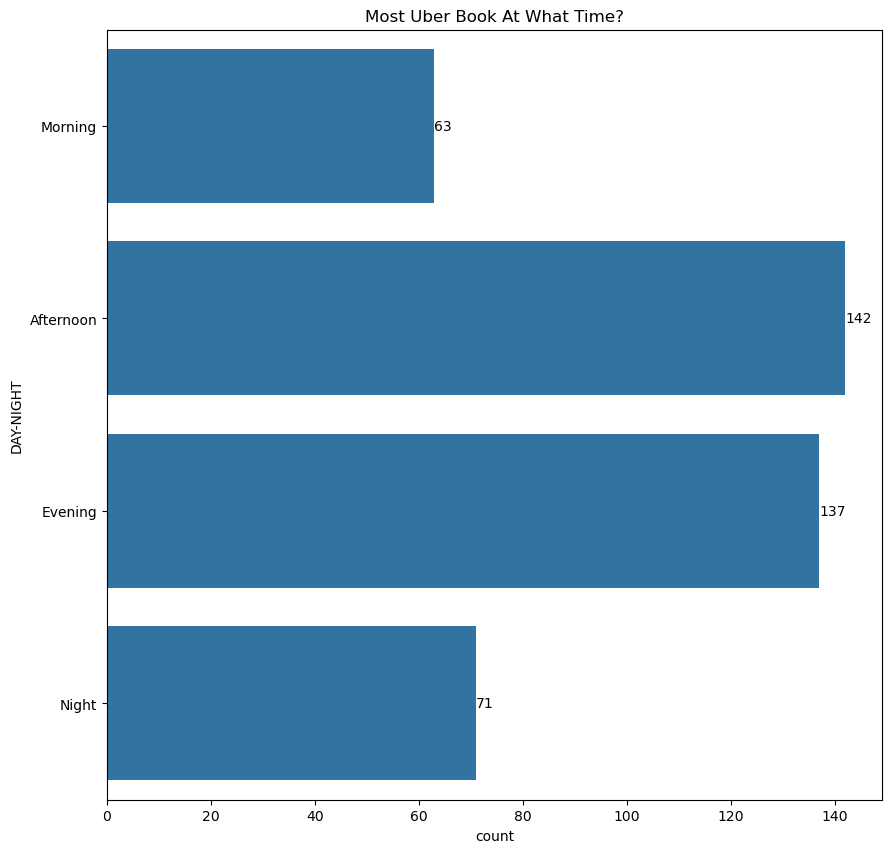

In [69]:
plt.figure(figsize=(10,10))
plt.title("Most Uber Book At What Time?")
cp=sns.countplot(uber["DAY-NIGHT"])
cp.bar_label(cp.containers[0])
plt.show()

In [71]:
#So We Can Say That Mostly People Book The Uber At Afternoon!!! 

In [73]:
#Q4 IN WHICH MONTHS DO PEOPLE BOOK UBER RIDES LESS FREQUENTLY?

In [75]:
#Lets Make New Month Column!!!

In [77]:
uber["MONTH"]=pd.DatetimeIndex(uber["START_DATE"]).month
month_label={1.0 : "Jan", 2.0 : "Feb", 3.0 : "March", 4.0 : "April", 5.0 : "May", 6.0 : "June", 7.0 : "July", 8.0 : "August", 9.0 : "Sept", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
uber["MONTH"]=uber.MONTH.map(month_label)
mon=uber.MONTH.value_counts(sort=False)

In [79]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


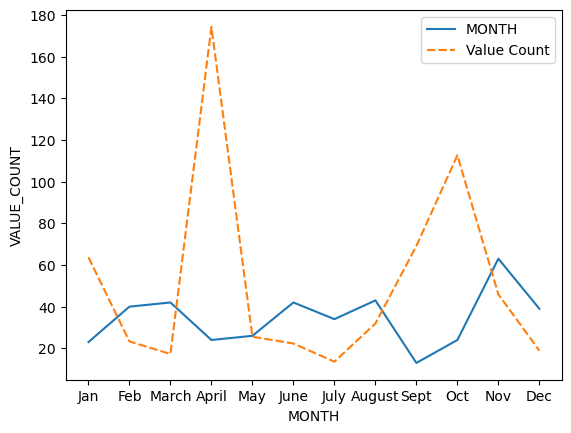

In [81]:
df=pd.DataFrame({"MONTH" : mon.values,
"Value Count":uber.groupby("MONTH", sort=False)["MILES"].max()
})
lp=sns.lineplot(data=df)
lp.set(xlabel="MONTH", ylabel="VALUE_COUNT")
plt.show()

In [115]:
#So We Can Say That On September Month The Uber Cabs Is Booked Less Frequently!!!

In [117]:
#Q5 ON WHICH DAYS OF THE WEEK DO PEOPLE BOOK UBER RIDES THE MOST?

In [ ]:
#Lets Make The New Day Column!!!

In [89]:
uber["DAY"]=uber.START_DATE.dt.weekday
day_label={0 : "Monday", 1 : "Tuesday", 2 : "Wednesday", 3 : "Thursday", 4 : "Friday", 5 : "Saturday", 6 : "Sunday"}
uber["DAY"]=uber["DAY"].map(day_label)

In [91]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal Reasons,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


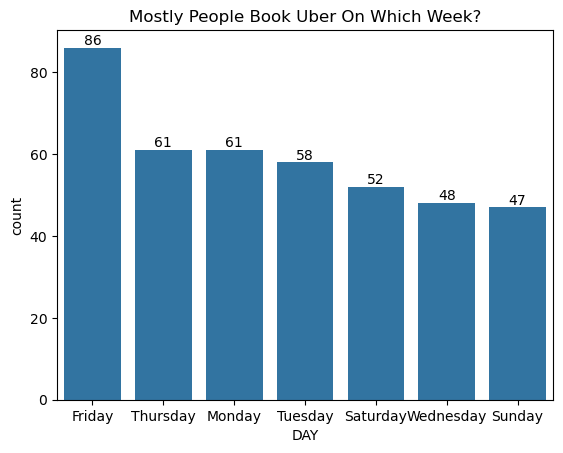

In [93]:
day_label=uber.DAY.value_counts()
plt.title("Mostly People Book Uber On Which Week?")
bp=sns.barplot(x=day_label.index, y=day_label)
bp.bar_label(bp.containers[0])
plt.show()

In [95]:
#SO We Can Say That Most Uber Booked On Fridays!!!

In [97]:
#Q6 HOW MANY MILES DO PEOPLE USUALLY BOOK A CAB THROUGH UBER?

C:\Users\ACER\AppData\Local\Temp\ipykernel_12252\1974239621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber[uber["MILES"]<40]["MILES"])


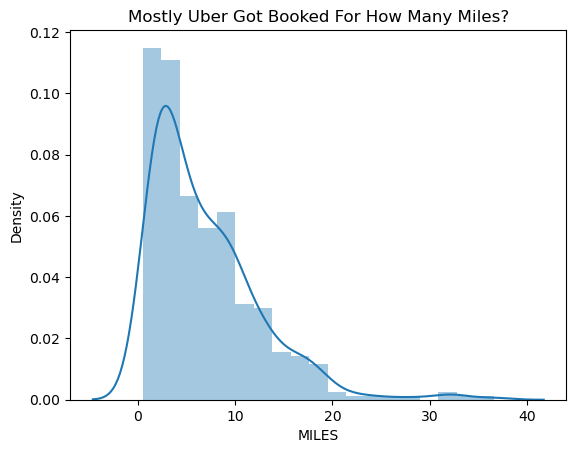

In [101]:
plt.title("Mostly Uber Got Booked For How Many Miles?")
sns.distplot(uber[uber["MILES"]<40]["MILES"])
plt.show()

In [ ]:
#So We Can Say Mostly People Book Uber For 0-20 Miles!!!